In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2022-05-08 16:56:57--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 209.85.147.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2022-05-08 16:56:57 (97.9 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [ ]:
import json

with open("./sarcasm.json") as f:
  datastore = json.load(f)

sentences = []
labels = []

for data in datastore:
  sentences.append(data['headline'])
  labels.append(data['is_sarcastic'])

In [ ]:
training_size = 20000

vocab_size = 10000

max_length = 120

embedding_dim = 16

In [ ]:
import numpy as np

train_sentences = sentences[:training_size]
test_sentences = sentences[training_size:]

train_labels = labels[:training_size]
test_labels = labels[training_size:]

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

trunc_type='post'
padding_type='post'
oov_token='<OOV>'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)

tokenizer.fit_on_texts(train_sentences)

word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
import tensorflow as tf

g1_layer = tf.keras.layers.GlobalMaxPooling1D()

sample = np.array([[[1,2,4],[7,5,9],[9,1,3],[10,15,1]]])

print(sample)
print(sample.shape)

converted_sample = g1_layer(sample)

print(converted_sample.numpy())
print(converted_sample.shape)

[[[ 1  2  4]
  [ 7  5  9]
  [ 9  1  3]
  [10 15  1]]]
(1, 4, 3)
[[10 15  9]]
(1, 3)


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
       tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
       tf.keras.layers.GlobalMaxPooling1D(),
       tf.keras.layers.Dense(16, activation='relu'),
       tf.keras.layers.Dense(1, activation='sigmoid')                      
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 global_max_pooling1d_1 (Glo  (None, 16)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
num_epochs = 5

history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels), verbose=2)

Epoch 1/5
625/625 - 4s - loss: 0.5334 - accuracy: 0.7192 - val_loss: 0.4057 - val_accuracy: 0.8202 - 4s/epoch - 6ms/step
Epoch 2/5
625/625 - 3s - loss: 0.3090 - accuracy: 0.8723 - val_loss: 0.3622 - val_accuracy: 0.8377 - 3s/epoch - 5ms/step
Epoch 3/5
625/625 - 3s - loss: 0.1990 - accuracy: 0.9232 - val_loss: 0.3778 - val_accuracy: 0.8413 - 3s/epoch - 5ms/step
Epoch 4/5
625/625 - 3s - loss: 0.1275 - accuracy: 0.9551 - val_loss: 0.4164 - val_accuracy: 0.8371 - 3s/epoch - 5ms/step
Epoch 5/5
625/625 - 3s - loss: 0.0790 - accuracy: 0.9751 - val_loss: 0.4698 - val_accuracy: 0.8348 - 3s/epoch - 5ms/step


In [ ]:
model.save("mymodel.h5")

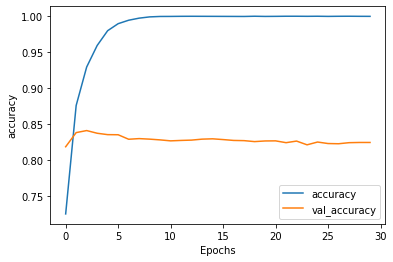

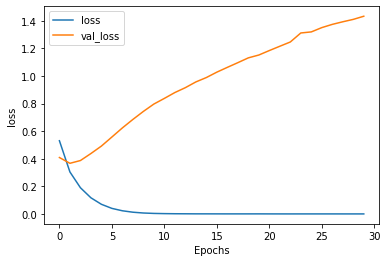

In [ ]:
import matplotlib.pyplot as plt

def graph_result(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

graph_result(history, 'accuracy')
graph_result(history, 'loss')  

In [ ]:
reverse_word_index = tokenizer.index_word

embedding_layer = model.layers[0]

embedding_weights = embedding_layer.get_weights()[0]

print(embedding_weights.shape)

(10000, 16)


In [ ]:
import io

# Open writeable files
out_v = io.open('vecs_sarcasm.tsv', 'w', encoding='utf-8')
out_m = io.open('meta_sarcasm.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, vocab_size):

  # Get the word associated at the current index
  word_name = reverse_word_index[word_num]

  # Get the embedding weights associated with the current index
  word_embedding = embedding_weights[word_num]

  # Write the word name
  out_m.write(word_name + "\n")

  # Write the word embedding
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

# Close the files
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass

# Download the files
else:
  files.download('vecs_sarcasm.tsv')
  files.download('meta_sarcasm.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>